In [1]:
import sys
import numpy as np

from collections import deque
from unityagents import UnityEnvironment

from agent import Parameters, ExperienceReplay, Agent

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Monitor(object):
    def __init__(self):
        pass
    
    def run(self, params, name):
        env = UnityEnvironment(file_name="Banana.x86_64")

        brain_name = env.brain_names[0]
        brain = env.brains[brain_name]
        
        env_info = env.reset(train_mode=True)[brain_name]
        
        num_states = len(env_info.vector_observations[0])
        num_actions = brain.vector_action_space_size
        
        memory = ExperienceReplay(params)
        agent = Agent(params, num_states, num_actions, memory)
        
        last_rewards = deque(maxlen=100)
        average_rewards = deque(maxlen=params.num_episodes)
        scores = []
        
        solved = False
        solved_episodes = 0
        for i_episode in range(params.num_episodes):
            env_info = env.reset(train_mode=True)[brain_name]
            state = env_info.vector_observations[0]
            score = 0
        
            while True:
                action = agent.get_action(state)
        
                env_info = env.step(action)[brain_name]
                new_state = env_info.vector_observations[0]
                reward = env_info.rewards[0]
                done = env_info.local_done[0]
                score += reward
        
                memory.push(state, action, new_state, reward, done)
                agent.optimize()
        
                state = new_state
                if done:
                    last_rewards.append(score)
                    scores.append(score)
        
                    average_reward = np.mean(last_rewards)
                    average_rewards.append(average_reward)
        
                    print("\r {}/{}: average score {:.2f}".format(i_episode, params.num_episodes, average_reward), end="")
                    sys.stdout.flush()
        
                    if average_reward >= params.solve_score:
                        solved = True
                        solved_episodes = i_episode
        
                    break
                    
            if solved:
                break
                
        if solved:
            print("\nsolved in {} episodes".format(solved_episodes))
            
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel("score")
            plt.xlabel("episode #")
            plt.show()
            
            model_path = "navigation_{}.pth".format(name)
            print("save model to {}".format(model_path))
            agent.save_model(model_path)
        
        env.close()
        
    def test(self, params, name):
        model_path = "navigation_{}.pth".format(name)
        
        env = UnityEnvironment(file_name="Banana.x86_64")
        brain_name = env.brain_names[0]
        brain = env.brains[brain_name]
        
        env_info = env.reset(train_mode=False)[brain_name]
        
        num_states = len(env_info.vector_observations[0])
        num_actions = brain.vector_action_space_size
        
        agent = Agent(params, num_states, num_actions, None)
        agent.load_model(model_path)
        
        state = env_info.vector_observations[0]
        score = 0  
        while True:
            action = agent.get_action(state)
            env_info = env.step(action)[brain_name]  
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0] 
            done = env_info.local_done[0] 
            score += reward
            state = next_state 
            if done: 
                break

        print("test score: {}".format(score))

        env.close()
       
    def run_basic(self):
        params = Parameters()
        
        self.run(params, "basic")
        
    def test_basic(self):
        params = Parameters()
        
        self.test(params, "basic")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


 0/2000: average score 0.00

 1/2000: average score -0.50

 2/2000: average score -0.67

 3/2000: average score 1.25

 4/2000: average score 1.20

 5/2000: average score 1.17

 6/2000: average score 1.29

 7/2000: average score 1.38

 8/2000: average score 1.33

 9/2000: average score 2.00

 10/2000: average score 2.45

 11/2000: average score 2.50

 12/2000: average score 2.54

 13/2000: average score 2.71

 14/2000: average score 2.53

 15/2000: average score 2.56

 16/2000: average score 2.41

 17/2000: average score 2.56

 18/2000: average score 2.74

 19/2000: average score 2.75

 20/2000: average score 2.67

 21/2000: average score 2.55

 22/2000: average score 2.43

 23/2000: average score 2.92

 24/2000: average score 2.88

 25/2000: average score 3.12

 26/2000: average score 3.33

 27/2000: average score 3.21

 28/2000: average score 3.14

 29/2000: average score 3.33

 30/2000: average score 3.45

 31/2000: average score 3.47

 32/2000: average score 3.58

 33/2000: average score 3.68

 34/2000: average score 3.77

 35/2000: average score 3.69

 36/2000: average score 3.73

 37/2000: average score 3.63

 38/2000: average score 3.54

 39/2000: average score 3.52

 40/2000: average score 3.49

 41/2000: average score 3.48

 42/2000: average score 3.51

 43/2000: average score 3.52

 44/2000: average score 3.53

 45/2000: average score 3.52

 46/2000: average score 3.47

 47/2000: average score 3.44

 48/2000: average score 3.51

 49/2000: average score 3.50

 50/2000: average score 3.55

 51/2000: average score 3.50

 52/2000: average score 3.45

 53/2000: average score 3.48

 54/2000: average score 3.45

 55/2000: average score 3.46

 56/2000: average score 3.58

 57/2000: average score 3.69

 58/2000: average score 3.68

 59/2000: average score 3.65

 60/2000: average score 3.59

 61/2000: average score 3.53

 62/2000: average score 3.51

 63/2000: average score 3.69

 64/2000: average score 3.66

 65/2000: average score 3.67

 66/2000: average score 3.63

 67/2000: average score 3.65

 68/2000: average score 3.70

 69/2000: average score 3.70

 70/2000: average score 3.68

 71/2000: average score 3.85

 72/2000: average score 3.89

 73/2000: average score 3.93

 74/2000: average score 4.03

 75/2000: average score 4.03

 76/2000: average score 4.01

 77/2000: average score 3.96

 78/2000: average score 4.01

 79/2000: average score 4.03

 80/2000: average score 4.01

 81/2000: average score 4.05

 82/2000: average score 4.01

 83/2000: average score 4.00

 84/2000: average score 4.01

 85/2000: average score 4.05

 86/2000: average score 4.10

 87/2000: average score 4.11

 88/2000: average score 4.16

 89/2000: average score 4.11

 90/2000: average score 4.05

 91/2000: average score 4.13

 92/2000: average score 4.18

 93/2000: average score 4.20

 94/2000: average score 4.21

 95/2000: average score 4.25

 96/2000: average score 4.28

 97/2000: average score 4.28

 98/2000: average score 4.30

 99/2000: average score 4.31

 100/2000: average score 4.35

 101/2000: average score 4.36

 102/2000: average score 4.43

 103/2000: average score 4.35

 104/2000: average score 4.40

 105/2000: average score 4.47

 106/2000: average score 4.58

 107/2000: average score 4.68

 108/2000: average score 4.68

 109/2000: average score 4.60

 110/2000: average score 4.55

 111/2000: average score 4.52

 112/2000: average score 4.52

 113/2000: average score 4.54

 114/2000: average score 4.67

 115/2000: average score 4.71

 116/2000: average score 4.82

 117/2000: average score 4.85

 118/2000: average score 4.87

 119/2000: average score 4.90

 120/2000: average score 4.93

 121/2000: average score 5.00

 122/2000: average score 5.05

 123/2000: average score 4.89

 124/2000: average score 4.95

 125/2000: average score 4.90

 126/2000: average score 4.91

 127/2000: average score 5.00

 128/2000: average score 5.12

 129/2000: average score 5.12

 130/2000: average score 5.17

 131/2000: average score 5.25

 132/2000: average score 5.23

 133/2000: average score 5.23

 134/2000: average score 5.22

 135/2000: average score 5.33

 136/2000: average score 5.38

 137/2000: average score 5.43

 138/2000: average score 5.50

 139/2000: average score 5.56

 140/2000: average score 5.63

 141/2000: average score 5.67

 142/2000: average score 5.70

 143/2000: average score 5.72

 144/2000: average score 5.74

 145/2000: average score 5.85

 146/2000: average score 5.94

 147/2000: average score 6.03

 148/2000: average score 6.07

 149/2000: average score 6.11

 150/2000: average score 6.17

 151/2000: average score 6.24

 152/2000: average score 6.30

 153/2000: average score 6.29

 154/2000: average score 6.31

 155/2000: average score 6.38

 156/2000: average score 6.40

 157/2000: average score 6.37

 158/2000: average score 6.40

 159/2000: average score 6.52

 160/2000: average score 6.59

 161/2000: average score 6.66

 162/2000: average score 6.77

 163/2000: average score 6.70

 164/2000: average score 6.77

 165/2000: average score 6.84

 166/2000: average score 6.97

 167/2000: average score 6.94

 168/2000: average score 6.91

 169/2000: average score 6.92

 170/2000: average score 7.06

 171/2000: average score 6.98

 172/2000: average score 6.99

 173/2000: average score 7.00

 174/2000: average score 7.01

 175/2000: average score 7.06

 176/2000: average score 7.14

 177/2000: average score 7.32

 178/2000: average score 7.36

 179/2000: average score 7.42

 180/2000: average score 7.56

 181/2000: average score 7.58

 182/2000: average score 7.71

 183/2000: average score 7.81

 184/2000: average score 7.84

 185/2000: average score 7.83

 186/2000: average score 7.83

 187/2000: average score 7.90

 188/2000: average score 7.93

 189/2000: average score 8.03

 190/2000: average score 8.21

 191/2000: average score 8.26

 192/2000: average score 8.26

 193/2000: average score 8.31

 194/2000: average score 8.30

 195/2000: average score 8.38

 196/2000: average score 8.42

 197/2000: average score 8.51

 198/2000: average score 8.46

 199/2000: average score 8.53

 200/2000: average score 8.58

 201/2000: average score 8.68

 202/2000: average score 8.73

 203/2000: average score 8.85

 204/2000: average score 8.91

 205/2000: average score 8.99

 206/2000: average score 8.93

 207/2000: average score 8.92

 208/2000: average score 8.98

 209/2000: average score 9.07

 210/2000: average score 9.17

 211/2000: average score 9.32

 212/2000: average score 9.44

 213/2000: average score 9.52

 214/2000: average score 9.49

 215/2000: average score 9.51

 216/2000: average score 9.50

 217/2000: average score 9.49

 218/2000: average score 9.53

 219/2000: average score 9.55

 220/2000: average score 9.64

 221/2000: average score 9.63

 222/2000: average score 9.70

 223/2000: average score 9.82

 224/2000: average score 9.89

 225/2000: average score 10.04

 226/2000: average score 9.97

 227/2000: average score 10.01

 228/2000: average score 9.98

 229/2000: average score 9.96

 230/2000: average score 9.94

 231/2000: average score 10.04

 232/2000: average score 10.07

 233/2000: average score 10.08

 234/2000: average score 10.08

 235/2000: average score 10.10

 236/2000: average score 10.16

 237/2000: average score 10.21

 238/2000: average score 10.25

 239/2000: average score 10.26

 240/2000: average score 10.26

 241/2000: average score 10.27

 242/2000: average score 10.34

 243/2000: average score 10.40

 244/2000: average score 10.45

 245/2000: average score 10.39

 246/2000: average score 10.37

 247/2000: average score 10.34

 248/2000: average score 10.38

 249/2000: average score 10.39

 250/2000: average score 10.35

 251/2000: average score 10.44

 252/2000: average score 10.46

 253/2000: average score 10.53

 254/2000: average score 10.55

 255/2000: average score 10.51

 256/2000: average score 10.50

 257/2000: average score 10.43

 258/2000: average score 10.48

 259/2000: average score 10.44

 260/2000: average score 10.48

 261/2000: average score 10.57

 262/2000: average score 10.56

 263/2000: average score 10.60

 264/2000: average score 10.59

 265/2000: average score 10.57

 266/2000: average score 10.51

 267/2000: average score 10.65

 268/2000: average score 10.74

 269/2000: average score 10.83

 270/2000: average score 10.79

 271/2000: average score 10.84

 272/2000: average score 10.81

 273/2000: average score 10.81

 274/2000: average score 10.80

 275/2000: average score 10.87

 276/2000: average score 10.93

 277/2000: average score 10.84

 278/2000: average score 10.86

 279/2000: average score 10.82

 280/2000: average score 10.72

 281/2000: average score 10.71

 282/2000: average score 10.73

 283/2000: average score 10.68

 284/2000: average score 10.74

 285/2000: average score 10.81

 286/2000: average score 10.90

 287/2000: average score 10.87

 288/2000: average score 10.86

 289/2000: average score 10.92

 290/2000: average score 10.81

 291/2000: average score 10.83

 292/2000: average score 10.88

 293/2000: average score 10.85

 294/2000: average score 10.90

 295/2000: average score 10.85

 296/2000: average score 10.85

 297/2000: average score 10.83

 298/2000: average score 10.92

 299/2000: average score 10.87

 300/2000: average score 10.93

 301/2000: average score 10.96

 302/2000: average score 10.99

 303/2000: average score 11.00

 304/2000: average score 10.97

 305/2000: average score 10.92

 306/2000: average score 10.95

 307/2000: average score 10.96

 308/2000: average score 11.02

 309/2000: average score 11.10

 310/2000: average score 11.15

 311/2000: average score 11.11

 312/2000: average score 11.10

 313/2000: average score 11.01

 314/2000: average score 11.09

 315/2000: average score 11.09

 316/2000: average score 11.03

 317/2000: average score 11.18

 318/2000: average score 11.13

 319/2000: average score 11.22

 320/2000: average score 11.27

 321/2000: average score 11.33

 322/2000: average score 11.32

 323/2000: average score 11.31

 324/2000: average score 11.26

 325/2000: average score 11.23

 326/2000: average score 11.35

 327/2000: average score 11.29

 328/2000: average score 11.33

 329/2000: average score 11.34

 330/2000: average score 11.39

 331/2000: average score 11.23

 332/2000: average score 11.25

 333/2000: average score 11.21

 334/2000: average score 11.23

 335/2000: average score 11.15

 336/2000: average score 11.11

 337/2000: average score 11.13

 338/2000: average score 11.19

 339/2000: average score 11.25

 340/2000: average score 11.31

 341/2000: average score 11.35

 342/2000: average score 11.34

 343/2000: average score 11.34

 344/2000: average score 11.35

 345/2000: average score 11.34

 346/2000: average score 11.34

 347/2000: average score 11.35

 348/2000: average score 11.38

 349/2000: average score 11.44

 350/2000: average score 11.45

 351/2000: average score 11.40

 352/2000: average score 11.45

 353/2000: average score 11.44

 354/2000: average score 11.46

 355/2000: average score 11.43

 356/2000: average score 11.37

 357/2000: average score 11.53

 358/2000: average score 11.59

 359/2000: average score 11.62

 360/2000: average score 11.66

 361/2000: average score 11.62

 362/2000: average score 11.56

 363/2000: average score 11.53

 364/2000: average score 11.55

 365/2000: average score 11.58

 366/2000: average score 11.55

 367/2000: average score 11.41

 368/2000: average score 11.41

 369/2000: average score 11.39

 370/2000: average score 11.33

 371/2000: average score 11.27

 372/2000: average score 11.29

 373/2000: average score 11.37

 374/2000: average score 11.42

 375/2000: average score 11.35

 376/2000: average score 11.30

 377/2000: average score 11.35

 378/2000: average score 11.26

 379/2000: average score 11.26

 380/2000: average score 11.28

 381/2000: average score 11.22

 382/2000: average score 11.13

 383/2000: average score 11.13

 384/2000: average score 11.11

 385/2000: average score 11.05

 386/2000: average score 11.00

 387/2000: average score 11.07

 388/2000: average score 11.15

 389/2000: average score 11.09

 390/2000: average score 11.21

 391/2000: average score 11.16

 392/2000: average score 11.08

 393/2000: average score 11.16

 394/2000: average score 11.14

 395/2000: average score 11.21

 396/2000: average score 11.20

 397/2000: average score 11.23

 398/2000: average score 11.23

 399/2000: average score 11.36

 400/2000: average score 11.36

 401/2000: average score 11.31

 402/2000: average score 11.26

 403/2000: average score 11.30

 404/2000: average score 11.32

 405/2000: average score 11.34

 406/2000: average score 11.41

 407/2000: average score 11.41

 408/2000: average score 11.37

 409/2000: average score 11.37

 410/2000: average score 11.32

 411/2000: average score 11.32

 412/2000: average score 11.34

 413/2000: average score 11.40

 414/2000: average score 11.37

 415/2000: average score 11.30

 416/2000: average score 11.42

 417/2000: average score 11.32

 418/2000: average score 11.34

 419/2000: average score 11.30

 420/2000: average score 11.24

 421/2000: average score 11.28

 422/2000: average score 11.25

 423/2000: average score 11.29

 424/2000: average score 11.25

 425/2000: average score 11.18

 426/2000: average score 11.13

 427/2000: average score 11.17

 428/2000: average score 11.15

 429/2000: average score 11.20

 430/2000: average score 11.19

 431/2000: average score 11.20

 432/2000: average score 11.21

 433/2000: average score 11.24

 434/2000: average score 11.32

 435/2000: average score 11.29

 436/2000: average score 11.22

 437/2000: average score 11.30

 438/2000: average score 11.22

 439/2000: average score 11.24

 440/2000: average score 11.16

 441/2000: average score 11.16

 442/2000: average score 11.11

 443/2000: average score 11.12

 444/2000: average score 11.11

 445/2000: average score 11.12

 446/2000: average score 11.17

 447/2000: average score 11.17

 448/2000: average score 11.13

 449/2000: average score 11.12

 450/2000: average score 11.19

 451/2000: average score 11.19

 452/2000: average score 11.23

 453/2000: average score 11.24

 454/2000: average score 11.30

 455/2000: average score 11.30

 456/2000: average score 11.35

 457/2000: average score 11.29

 458/2000: average score 11.24

 459/2000: average score 11.15

 460/2000: average score 11.13

 461/2000: average score 11.15

 462/2000: average score 11.20

 463/2000: average score 11.28

 464/2000: average score 11.25

 465/2000: average score 11.28

 466/2000: average score 11.31

 467/2000: average score 11.32

 468/2000: average score 11.25

 469/2000: average score 11.20

 470/2000: average score 11.30

 471/2000: average score 11.26

 472/2000: average score 11.26

 473/2000: average score 11.25

 474/2000: average score 11.21

 475/2000: average score 11.21

 476/2000: average score 11.18

 477/2000: average score 11.08

 478/2000: average score 11.13

 479/2000: average score 11.15

 480/2000: average score 11.20

 481/2000: average score 11.30

 482/2000: average score 11.31

 483/2000: average score 11.28

 484/2000: average score 11.25

 485/2000: average score 11.22

 486/2000: average score 11.14

 487/2000: average score 11.06

 488/2000: average score 10.99

 489/2000: average score 11.02

 490/2000: average score 10.94

 491/2000: average score 10.91

 492/2000: average score 10.93

 493/2000: average score 10.94

 494/2000: average score 11.06

 495/2000: average score 10.95

 496/2000: average score 10.97

 497/2000: average score 10.98

 498/2000: average score 10.94

 499/2000: average score 10.85

 500/2000: average score 10.83

 501/2000: average score 10.87

 502/2000: average score 10.94

 503/2000: average score 10.90

 504/2000: average score 10.92

 505/2000: average score 10.90

 506/2000: average score 10.83

 507/2000: average score 10.86

 508/2000: average score 10.90

 509/2000: average score 10.85

 510/2000: average score 10.84

 511/2000: average score 10.91

 512/2000: average score 10.84

 513/2000: average score 10.79

 514/2000: average score 10.71

 515/2000: average score 10.81

 516/2000: average score 10.76

 517/2000: average score 10.71

 518/2000: average score 10.64

 519/2000: average score 10.62

 520/2000: average score 10.66

 521/2000: average score 10.58

 522/2000: average score 10.59

 523/2000: average score 10.53

 524/2000: average score 10.59

 525/2000: average score 10.56

 526/2000: average score 10.58

 527/2000: average score 10.51

 528/2000: average score 10.51

 529/2000: average score 10.52

 530/2000: average score 10.51

 531/2000: average score 10.58

 532/2000: average score 10.62

 533/2000: average score 10.67

 534/2000: average score 10.65

 535/2000: average score 10.72

 536/2000: average score 10.83

 537/2000: average score 10.80

 538/2000: average score 10.82

 539/2000: average score 10.72

 540/2000: average score 10.78

 541/2000: average score 10.76

 542/2000: average score 10.82

 543/2000: average score 10.80

 544/2000: average score 10.84

 545/2000: average score 10.87

 546/2000: average score 10.87

 547/2000: average score 10.88

 548/2000: average score 10.87

 549/2000: average score 10.87

 550/2000: average score 10.80

 551/2000: average score 10.83

 552/2000: average score 10.78

 553/2000: average score 10.76

 554/2000: average score 10.78

 555/2000: average score 10.85

 556/2000: average score 10.85

 557/2000: average score 10.92

 558/2000: average score 10.88

 559/2000: average score 11.05

 560/2000: average score 11.06

 561/2000: average score 10.96

 562/2000: average score 10.92

 563/2000: average score 10.88

 564/2000: average score 10.86

 565/2000: average score 10.82

 566/2000: average score 10.85

 567/2000: average score 10.87

 568/2000: average score 10.93

 569/2000: average score 11.02

 570/2000: average score 10.95

 571/2000: average score 11.05

 572/2000: average score 11.08

 573/2000: average score 11.04

 574/2000: average score 11.02

 575/2000: average score 11.06

 576/2000: average score 11.04

 577/2000: average score 11.15

 578/2000: average score 11.27

 579/2000: average score 11.32

 580/2000: average score 11.29

 581/2000: average score 11.36

 582/2000: average score 11.39

 583/2000: average score 11.52

 584/2000: average score 11.59

 585/2000: average score 11.68

 586/2000: average score 11.76

 587/2000: average score 11.84

 588/2000: average score 11.85

 589/2000: average score 11.84

 590/2000: average score 11.95

 591/2000: average score 11.98

 592/2000: average score 12.06

 593/2000: average score 11.98

 594/2000: average score 11.91

 595/2000: average score 11.97

 596/2000: average score 11.91

 597/2000: average score 11.90

 598/2000: average score 11.96

 599/2000: average score 11.91

 600/2000: average score 11.88

 601/2000: average score 11.80

 602/2000: average score 11.66

 603/2000: average score 11.66

 604/2000: average score 11.70

 605/2000: average score 11.69

 606/2000: average score 11.67

 607/2000: average score 11.55

 608/2000: average score 11.51

 609/2000: average score 11.46

 610/2000: average score 11.47

 611/2000: average score 11.41

 612/2000: average score 11.42

 613/2000: average score 11.48

 614/2000: average score 11.53

 615/2000: average score 11.55

 616/2000: average score 11.57

 617/2000: average score 11.57

 618/2000: average score 11.69

 619/2000: average score 11.72

 620/2000: average score 11.63

 621/2000: average score 11.67

 622/2000: average score 11.70

 623/2000: average score 11.78

 624/2000: average score 11.79

 625/2000: average score 11.88

 626/2000: average score 11.86

 627/2000: average score 11.83

 628/2000: average score 11.84

 629/2000: average score 11.79

 630/2000: average score 11.80

 631/2000: average score 11.73

 632/2000: average score 11.70

 633/2000: average score 11.68

 634/2000: average score 11.64

 635/2000: average score 11.73

 636/2000: average score 11.65

 637/2000: average score 11.54

 638/2000: average score 11.50

 639/2000: average score 11.59

 640/2000: average score 11.66

 641/2000: average score 11.72

 642/2000: average score 11.70

 643/2000: average score 11.66

 644/2000: average score 11.62

 645/2000: average score 11.55

 646/2000: average score 11.48

 647/2000: average score 11.43

 648/2000: average score 11.47

 649/2000: average score 11.45

 650/2000: average score 11.50

 651/2000: average score 11.47

 652/2000: average score 11.39

 653/2000: average score 11.46

 654/2000: average score 11.39

 655/2000: average score 11.39

 656/2000: average score 11.47

 657/2000: average score 11.41

 658/2000: average score 11.37

 659/2000: average score 11.26

 660/2000: average score 11.16

 661/2000: average score 11.19

 662/2000: average score 11.29

 663/2000: average score 11.28

 664/2000: average score 11.36

 665/2000: average score 11.32

 666/2000: average score 11.35

 667/2000: average score 11.39

 668/2000: average score 11.39

 669/2000: average score 11.35

 670/2000: average score 11.37

 671/2000: average score 11.36

 672/2000: average score 11.37

 673/2000: average score 11.34

 674/2000: average score 11.25

 675/2000: average score 11.30

 676/2000: average score 11.39

 677/2000: average score 11.36

 678/2000: average score 11.22

 679/2000: average score 11.23

 680/2000: average score 11.23

 681/2000: average score 11.11

 682/2000: average score 11.20

 683/2000: average score 11.15

 684/2000: average score 11.07

 685/2000: average score 11.06

 686/2000: average score 11.07

 687/2000: average score 11.03

 688/2000: average score 11.01

 689/2000: average score 11.02

 690/2000: average score 10.97

 691/2000: average score 11.01

 692/2000: average score 10.97

 693/2000: average score 11.03

 694/2000: average score 11.08

 695/2000: average score 11.02

 696/2000: average score 11.04

 697/2000: average score 11.03

 698/2000: average score 11.00

 699/2000: average score 11.10

 700/2000: average score 11.08

 701/2000: average score 11.20

 702/2000: average score 11.35

 703/2000: average score 11.33

 704/2000: average score 11.28

 705/2000: average score 11.34

 706/2000: average score 11.37

 707/2000: average score 11.50

 708/2000: average score 11.53

 709/2000: average score 11.61

 710/2000: average score 11.62

 711/2000: average score 11.63

 712/2000: average score 11.71

 713/2000: average score 11.71

 714/2000: average score 11.70

 715/2000: average score 11.72

 716/2000: average score 11.75

 717/2000: average score 11.78

 718/2000: average score 11.72

 719/2000: average score 11.78

 720/2000: average score 11.83

 721/2000: average score 11.83

 722/2000: average score 11.83

 723/2000: average score 11.81

 724/2000: average score 11.83

 725/2000: average score 11.74

 726/2000: average score 11.80

 727/2000: average score 11.95

 728/2000: average score 11.98

 729/2000: average score 12.01

 730/2000: average score 11.99

 731/2000: average score 12.11

 732/2000: average score 12.11

 733/2000: average score 12.20

 734/2000: average score 12.24

 735/2000: average score 12.17

 736/2000: average score 12.17

 737/2000: average score 12.27

 738/2000: average score 12.32

 739/2000: average score 12.32

 740/2000: average score 12.21

 741/2000: average score 12.18

 742/2000: average score 12.12

 743/2000: average score 12.18

 744/2000: average score 12.18

 745/2000: average score 12.23

 746/2000: average score 12.33

 747/2000: average score 12.33

 748/2000: average score 12.26

 749/2000: average score 12.24

 750/2000: average score 12.30

 751/2000: average score 12.30

 752/2000: average score 12.39

 753/2000: average score 12.37

 754/2000: average score 12.30

 755/2000: average score 12.35

 756/2000: average score 12.31

 757/2000: average score 12.29

 758/2000: average score 12.34

 759/2000: average score 12.37

 760/2000: average score 12.46

 761/2000: average score 12.51

 762/2000: average score 12.47

 763/2000: average score 12.43

 764/2000: average score 12.35

 765/2000: average score 12.40

 766/2000: average score 12.36

 767/2000: average score 12.45

 768/2000: average score 12.45

 769/2000: average score 12.52

 770/2000: average score 12.53

 771/2000: average score 12.54

 772/2000: average score 12.46

 773/2000: average score 12.50

 774/2000: average score 12.60

 775/2000: average score 12.58

 776/2000: average score 12.54

 777/2000: average score 12.57

 778/2000: average score 12.57

 779/2000: average score 12.48

 780/2000: average score 12.49

 781/2000: average score 12.57

 782/2000: average score 12.49

 783/2000: average score 12.45

 784/2000: average score 12.50

 785/2000: average score 12.51

 786/2000: average score 12.47

 787/2000: average score 12.54

 788/2000: average score 12.58

 789/2000: average score 12.59

 790/2000: average score 12.52

 791/2000: average score 12.50

 792/2000: average score 12.54

 793/2000: average score 12.48

 794/2000: average score 12.31

 795/2000: average score 12.34

 796/2000: average score 12.37

 797/2000: average score 12.34

 798/2000: average score 12.37

 799/2000: average score 12.37

 800/2000: average score 12.40

 801/2000: average score 12.33

 802/2000: average score 12.32

 803/2000: average score 12.28

 804/2000: average score 12.26

 805/2000: average score 12.17

 806/2000: average score 12.22

 807/2000: average score 12.19

 808/2000: average score 12.21

 809/2000: average score 12.24

 810/2000: average score 12.26

 811/2000: average score 12.20

 812/2000: average score 12.06

 813/2000: average score 12.03

 814/2000: average score 12.03

 815/2000: average score 12.00

 816/2000: average score 11.98

 817/2000: average score 11.93

 818/2000: average score 12.02

 819/2000: average score 11.87

 820/2000: average score 11.86

 821/2000: average score 11.95

 822/2000: average score 11.90

 823/2000: average score 11.88

 824/2000: average score 11.82

 825/2000: average score 11.86

 826/2000: average score 11.82

 827/2000: average score 11.86

 828/2000: average score 11.85

 829/2000: average score 11.85

 830/2000: average score 11.94

 831/2000: average score 11.91

 832/2000: average score 11.92

 833/2000: average score 11.93

 834/2000: average score 11.97

 835/2000: average score 11.95

 836/2000: average score 11.97

 837/2000: average score 11.97

 838/2000: average score 11.99

 839/2000: average score 11.90

 840/2000: average score 11.97

 841/2000: average score 11.98

 842/2000: average score 12.04

 843/2000: average score 11.98

 844/2000: average score 12.00

 845/2000: average score 11.93

 846/2000: average score 11.92

 847/2000: average score 12.02

 848/2000: average score 12.06

 849/2000: average score 12.10

 850/2000: average score 12.04

 851/2000: average score 12.01

 852/2000: average score 11.93

 853/2000: average score 11.90

 854/2000: average score 12.05

 855/2000: average score 12.02

 856/2000: average score 12.07

 857/2000: average score 12.08

 858/2000: average score 12.12

 859/2000: average score 12.10

 860/2000: average score 12.02

 861/2000: average score 11.99

 862/2000: average score 12.02

 863/2000: average score 12.09

 864/2000: average score 12.20

 865/2000: average score 12.18

 866/2000: average score 12.17

 867/2000: average score 12.07

 868/2000: average score 11.99

 869/2000: average score 11.93

 870/2000: average score 11.94

 871/2000: average score 11.93

 872/2000: average score 12.02

 873/2000: average score 12.06

 874/2000: average score 12.09

 875/2000: average score 12.06

 876/2000: average score 12.06

 877/2000: average score 12.05

 878/2000: average score 12.09

 879/2000: average score 12.11

 880/2000: average score 12.15

 881/2000: average score 12.09

 882/2000: average score 12.05

 883/2000: average score 12.04

 884/2000: average score 12.06

 885/2000: average score 12.07

 886/2000: average score 12.10

 887/2000: average score 12.01

 888/2000: average score 11.93

 889/2000: average score 11.91

 890/2000: average score 11.94

 891/2000: average score 11.89

 892/2000: average score 11.89

 893/2000: average score 11.91

 894/2000: average score 12.03

 895/2000: average score 12.03

 896/2000: average score 12.05

 897/2000: average score 12.06

 898/2000: average score 12.08

 899/2000: average score 12.02

 900/2000: average score 12.02

 901/2000: average score 12.02

 902/2000: average score 12.01

 903/2000: average score 12.03

 904/2000: average score 12.12

 905/2000: average score 12.11

 906/2000: average score 11.97

 907/2000: average score 11.98

 908/2000: average score 12.01

 909/2000: average score 12.00

 910/2000: average score 12.00

 911/2000: average score 12.04

 912/2000: average score 12.13

 913/2000: average score 12.20

 914/2000: average score 12.22

 915/2000: average score 12.17

 916/2000: average score 12.10

 917/2000: average score 12.17

 918/2000: average score 12.15

 919/2000: average score 12.15

 920/2000: average score 12.17

 921/2000: average score 12.02

 922/2000: average score 12.06

 923/2000: average score 12.10

 924/2000: average score 12.16

 925/2000: average score 12.16

 926/2000: average score 12.17

 927/2000: average score 12.10

 928/2000: average score 12.05

 929/2000: average score 12.04

 930/2000: average score 11.99

 931/2000: average score 11.98

 932/2000: average score 11.96

 933/2000: average score 11.93

 934/2000: average score 11.86

 935/2000: average score 11.85

 936/2000: average score 11.85

 937/2000: average score 11.75

 938/2000: average score 11.74

 939/2000: average score 11.85

 940/2000: average score 11.84

 941/2000: average score 11.83

 942/2000: average score 11.77

 943/2000: average score 11.82

 944/2000: average score 11.83

 945/2000: average score 11.86

 946/2000: average score 11.82

 947/2000: average score 11.73

 948/2000: average score 11.65

 949/2000: average score 11.64

 950/2000: average score 11.68

 951/2000: average score 11.72

 952/2000: average score 11.77

 953/2000: average score 11.76

 954/2000: average score 11.70

 955/2000: average score 11.70

 956/2000: average score 11.59

 957/2000: average score 11.65

 958/2000: average score 11.66

 959/2000: average score 11.63

 960/2000: average score 11.70

 961/2000: average score 11.71

 962/2000: average score 11.70

 963/2000: average score 11.60

 964/2000: average score 11.51

 965/2000: average score 11.55

 966/2000: average score 11.52

 967/2000: average score 11.50

 968/2000: average score 11.54

 969/2000: average score 11.63

 970/2000: average score 11.62

 971/2000: average score 11.64

 972/2000: average score 11.62

 973/2000: average score 11.59

 974/2000: average score 11.63

 975/2000: average score 11.58

 976/2000: average score 11.57

 977/2000: average score 11.56

 978/2000: average score 11.59

 979/2000: average score 11.67

 980/2000: average score 11.58

 981/2000: average score 11.60

 982/2000: average score 11.66

 983/2000: average score 11.72

 984/2000: average score 11.70

 985/2000: average score 11.69

 986/2000: average score 11.65

 987/2000: average score 11.68

 988/2000: average score 11.81

 989/2000: average score 11.73

 990/2000: average score 11.73

 991/2000: average score 11.75

 992/2000: average score 11.68

 993/2000: average score 11.74

 994/2000: average score 11.69

 995/2000: average score 11.77

 996/2000: average score 11.80

 997/2000: average score 11.86

 998/2000: average score 11.89

 999/2000: average score 11.93

 1000/2000: average score 12.00

 1001/2000: average score 12.01

 1002/2000: average score 11.99

 1003/2000: average score 12.08

 1004/2000: average score 11.97

 1005/2000: average score 12.05

 1006/2000: average score 12.13

 1007/2000: average score 12.14

 1008/2000: average score 12.10

 1009/2000: average score 12.06

 1010/2000: average score 12.03

 1011/2000: average score 12.04

 1012/2000: average score 12.05

 1013/2000: average score 11.99

 1014/2000: average score 11.90

 1015/2000: average score 11.96

 1016/2000: average score 12.04

 1017/2000: average score 12.00

 1018/2000: average score 12.07

 1019/2000: average score 12.14

 1020/2000: average score 12.10

 1021/2000: average score 12.16

 1022/2000: average score 12.17

 1023/2000: average score 12.18

 1024/2000: average score 12.14

 1025/2000: average score 12.11

 1026/2000: average score 12.11

 1027/2000: average score 12.08

 1028/2000: average score 12.16

 1029/2000: average score 12.14

 1030/2000: average score 12.15

 1031/2000: average score 12.15

 1032/2000: average score 12.14

 1033/2000: average score 12.16

 1034/2000: average score 12.19

 1035/2000: average score 12.24

 1036/2000: average score 12.24

 1037/2000: average score 12.29

 1038/2000: average score 12.26

 1039/2000: average score 12.14

 1040/2000: average score 12.17

 1041/2000: average score 12.18

 1042/2000: average score 12.28

 1043/2000: average score 12.17

 1044/2000: average score 12.22

 1045/2000: average score 12.34

 1046/2000: average score 12.40

 1047/2000: average score 12.51

 1048/2000: average score 12.59

 1049/2000: average score 12.63

 1050/2000: average score 12.52

 1051/2000: average score 12.55

 1052/2000: average score 12.59

 1053/2000: average score 12.63

 1054/2000: average score 12.58

 1055/2000: average score 12.63

 1056/2000: average score 12.65

 1057/2000: average score 12.64

 1058/2000: average score 12.53

 1059/2000: average score 12.61

 1060/2000: average score 12.60

 1061/2000: average score 12.59

 1062/2000: average score 12.61

 1063/2000: average score 12.68

 1064/2000: average score 12.73

 1065/2000: average score 12.74

 1066/2000: average score 12.86

 1067/2000: average score 12.92

 1068/2000: average score 12.96

 1069/2000: average score 12.93

 1070/2000: average score 12.99

 1071/2000: average score 13.03


solved in 1071 episodes


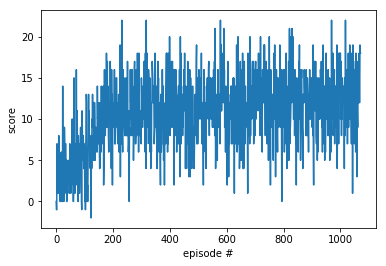

save model to navigation_basic.pth


In [3]:
basic_monitor = Monitor()
basic_params = Parameters()

basic_monitor.run(basic_params, "basic")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


 0/2000: average score 0.00

 1/2000: average score 0.00

 2/2000: average score 0.00

 3/2000: average score -0.25

 4/2000: average score -0.40

 5/2000: average score -0.33

 6/2000: average score -0.29

 7/2000: average score -0.12

 8/2000: average score 0.00

 9/2000: average score -0.20

 10/2000: average score -0.64

 11/2000: average score -0.42

 12/2000: average score -0.54

 13/2000: average score -0.50

 14/2000: average score -0.53

 15/2000: average score -0.50

 16/2000: average score -0.47

 17/2000: average score -0.39

 18/2000: average score -0.32

 19/2000: average score -0.25

 20/2000: average score -0.24

 21/2000: average score -0.18

 22/2000: average score -0.22

 23/2000: average score -0.17

 24/2000: average score -0.24

 25/2000: average score -0.35

 26/2000: average score -0.41

 27/2000: average score -0.36

 28/2000: average score -0.38

 29/2000: average score -0.37

 30/2000: average score -0.32

 31/2000: average score -0.28

 32/2000: average score -0.33

 33/2000: average score -0.35

 34/2000: average score -0.34

 35/2000: average score -0.33

 36/2000: average score -0.32

 37/2000: average score -0.34

 38/2000: average score -0.36

 39/2000: average score -0.35

 40/2000: average score -0.37

 41/2000: average score -0.33

 42/2000: average score -0.33

 43/2000: average score -0.32

 44/2000: average score -0.31

 45/2000: average score -0.30

 46/2000: average score -0.32

 47/2000: average score -0.33

 48/2000: average score -0.33

 49/2000: average score -0.32

 50/2000: average score -0.25

 51/2000: average score -0.25

 52/2000: average score -0.25

 53/2000: average score -0.28

 54/2000: average score -0.27

 55/2000: average score -0.29

 56/2000: average score -0.23

 57/2000: average score -0.22

 58/2000: average score -0.22

 59/2000: average score -0.18

 60/2000: average score -0.15

 61/2000: average score -0.10

 62/2000: average score -0.08

 63/2000: average score -0.06

 64/2000: average score -0.05

 65/2000: average score -0.05

 66/2000: average score -0.03

 67/2000: average score 0.00

 68/2000: average score 0.07

 69/2000: average score 0.09

 70/2000: average score 0.11

 71/2000: average score 0.15

 72/2000: average score 0.15

 73/2000: average score 0.19

 74/2000: average score 0.17

 75/2000: average score 0.21

 76/2000: average score 0.23

 77/2000: average score 0.22

 78/2000: average score 0.29

 79/2000: average score 0.30

 80/2000: average score 0.38

 81/2000: average score 0.44

 82/2000: average score 0.46

 83/2000: average score 0.50

 84/2000: average score 0.52

 85/2000: average score 0.56

 86/2000: average score 0.63

 87/2000: average score 0.73

 88/2000: average score 0.83

 89/2000: average score 0.86

 90/2000: average score 0.93

 91/2000: average score 0.93

 92/2000: average score 0.96

 93/2000: average score 1.03

 94/2000: average score 1.13

 95/2000: average score 1.21

 96/2000: average score 1.27

 97/2000: average score 1.39

 98/2000: average score 1.40

 99/2000: average score 1.48

 100/2000: average score 1.50

 101/2000: average score 1.57

 102/2000: average score 1.62

 103/2000: average score 1.66

 104/2000: average score 1.79

 105/2000: average score 1.84

 106/2000: average score 1.97

 107/2000: average score 2.01

 108/2000: average score 2.14

 109/2000: average score 2.19

 110/2000: average score 2.33

 111/2000: average score 2.38

 112/2000: average score 2.41

 113/2000: average score 2.49

 114/2000: average score 2.57

 115/2000: average score 2.62

 116/2000: average score 2.67

 117/2000: average score 2.77

 118/2000: average score 2.81

 119/2000: average score 2.87

 120/2000: average score 2.95

 121/2000: average score 3.01

 122/2000: average score 3.09

 123/2000: average score 3.17

 124/2000: average score 3.22

 125/2000: average score 3.37

 126/2000: average score 3.40

 127/2000: average score 3.46

 128/2000: average score 3.57

 129/2000: average score 3.66

 130/2000: average score 3.75

 131/2000: average score 3.84

 132/2000: average score 3.89

 133/2000: average score 4.00

 134/2000: average score 4.07

 135/2000: average score 4.19

 136/2000: average score 4.28

 137/2000: average score 4.37

 138/2000: average score 4.46

 139/2000: average score 4.58

 140/2000: average score 4.73

 141/2000: average score 4.79

 142/2000: average score 4.81

 143/2000: average score 4.92

 144/2000: average score 4.99

 145/2000: average score 5.06

 146/2000: average score 5.10

 147/2000: average score 5.21

 148/2000: average score 5.33

 149/2000: average score 5.43

 150/2000: average score 5.47

 151/2000: average score 5.56

 152/2000: average score 5.63

 153/2000: average score 5.75

 154/2000: average score 5.84

 155/2000: average score 5.86

 156/2000: average score 5.93

 157/2000: average score 6.02

 158/2000: average score 6.07

 159/2000: average score 6.11

 160/2000: average score 6.16

 161/2000: average score 6.23

 162/2000: average score 6.32

 163/2000: average score 6.40

 164/2000: average score 6.49

 165/2000: average score 6.57

 166/2000: average score 6.64

 167/2000: average score 6.69

 168/2000: average score 6.71

 169/2000: average score 6.89

 170/2000: average score 6.96

 171/2000: average score 7.05

 172/2000: average score 7.15

 173/2000: average score 7.21

 174/2000: average score 7.28

 175/2000: average score 7.33

 176/2000: average score 7.38

 177/2000: average score 7.52

 178/2000: average score 7.59

 179/2000: average score 7.61

 180/2000: average score 7.62

 181/2000: average score 7.70

 182/2000: average score 7.80

 183/2000: average score 7.81

 184/2000: average score 7.86

 185/2000: average score 8.00

 186/2000: average score 8.05

 187/2000: average score 8.01

 188/2000: average score 7.96

 189/2000: average score 8.02

 190/2000: average score 7.96

 191/2000: average score 8.08

 192/2000: average score 8.09

 193/2000: average score 8.13

 194/2000: average score 8.16

 195/2000: average score 8.14

 196/2000: average score 8.22

 197/2000: average score 8.19

 198/2000: average score 8.26

 199/2000: average score 8.28

 200/2000: average score 8.35

 201/2000: average score 8.38

 202/2000: average score 8.41

 203/2000: average score 8.46

 204/2000: average score 8.45

 205/2000: average score 8.48

 206/2000: average score 8.46

 207/2000: average score 8.52

 208/2000: average score 8.39

 209/2000: average score 8.50

 210/2000: average score 8.52

 211/2000: average score 8.54

 212/2000: average score 8.67

 213/2000: average score 8.72

 214/2000: average score 8.80

 215/2000: average score 8.83

 216/2000: average score 8.88

 217/2000: average score 8.84

 218/2000: average score 8.92

 219/2000: average score 8.94

 220/2000: average score 8.95

 221/2000: average score 8.93

 222/2000: average score 8.96

 223/2000: average score 8.98

 224/2000: average score 9.05

 225/2000: average score 9.11

 226/2000: average score 9.19

 227/2000: average score 9.20

 228/2000: average score 9.24

 229/2000: average score 9.29

 230/2000: average score 9.22

 231/2000: average score 9.24

 232/2000: average score 9.25

 233/2000: average score 9.23

 234/2000: average score 9.25

 235/2000: average score 9.19

 236/2000: average score 9.17

 237/2000: average score 9.21

 238/2000: average score 9.26

 239/2000: average score 9.25

 240/2000: average score 9.21

 241/2000: average score 9.25

 242/2000: average score 9.31

 243/2000: average score 9.32

 244/2000: average score 9.30

 245/2000: average score 9.31

 246/2000: average score 9.38

 247/2000: average score 9.37

 248/2000: average score 9.40

 249/2000: average score 9.37

 250/2000: average score 9.36

 251/2000: average score 9.34

 252/2000: average score 9.31

 253/2000: average score 9.31

 254/2000: average score 9.26

 255/2000: average score 9.35

 256/2000: average score 9.38

 257/2000: average score 9.37

 258/2000: average score 9.39

 259/2000: average score 9.49

 260/2000: average score 9.47

 261/2000: average score 9.52

 262/2000: average score 9.44

 263/2000: average score 9.41

 264/2000: average score 9.38

 265/2000: average score 9.32

 266/2000: average score 9.34

 267/2000: average score 9.43

 268/2000: average score 9.46

 269/2000: average score 9.36

 270/2000: average score 9.35

 271/2000: average score 9.35

 272/2000: average score 9.36

 273/2000: average score 9.48

 274/2000: average score 9.52

 275/2000: average score 9.64

 276/2000: average score 9.66

 277/2000: average score 9.65

 278/2000: average score 9.59

 279/2000: average score 9.68

 280/2000: average score 9.69

 281/2000: average score 9.65

 282/2000: average score 9.61

 283/2000: average score 9.68

 284/2000: average score 9.68

 285/2000: average score 9.60

 286/2000: average score 9.60

 287/2000: average score 9.64

 288/2000: average score 9.73

 289/2000: average score 9.80

 290/2000: average score 9.85

 291/2000: average score 9.81

 292/2000: average score 9.86

 293/2000: average score 9.79

 294/2000: average score 9.82

 295/2000: average score 9.82

 296/2000: average score 9.81

 297/2000: average score 9.86

 298/2000: average score 9.81

 299/2000: average score 9.78

 300/2000: average score 9.87

 301/2000: average score 9.95

 302/2000: average score 9.98

 303/2000: average score 10.00

 304/2000: average score 10.09

 305/2000: average score 10.20

 306/2000: average score 10.25

 307/2000: average score 10.20

 308/2000: average score 10.27

 309/2000: average score 10.31

 310/2000: average score 10.32

 311/2000: average score 10.36

 312/2000: average score 10.29

 313/2000: average score 10.31

 314/2000: average score 10.27

 315/2000: average score 10.28

 316/2000: average score 10.27

 317/2000: average score 10.33

 318/2000: average score 10.36

 319/2000: average score 10.43

 320/2000: average score 10.46

 321/2000: average score 10.53

 322/2000: average score 10.59

 323/2000: average score 10.61

 324/2000: average score 10.64

 325/2000: average score 10.50

 326/2000: average score 10.50

 327/2000: average score 10.45

 328/2000: average score 10.42

 329/2000: average score 10.46

 330/2000: average score 10.55

 331/2000: average score 10.50

 332/2000: average score 10.61

 333/2000: average score 10.67

 334/2000: average score 10.65

 335/2000: average score 10.71

 336/2000: average score 10.77

 337/2000: average score 10.80

 338/2000: average score 10.83

 339/2000: average score 10.81

 340/2000: average score 10.80

 341/2000: average score 10.81

 342/2000: average score 10.88

 343/2000: average score 10.83

 344/2000: average score 10.95

 345/2000: average score 11.00

 346/2000: average score 10.93

 347/2000: average score 10.97

 348/2000: average score 11.01

 349/2000: average score 11.05

 350/2000: average score 11.15

 351/2000: average score 11.25

 352/2000: average score 11.34

 353/2000: average score 11.39

 354/2000: average score 11.52

 355/2000: average score 11.59

 356/2000: average score 11.56

 357/2000: average score 11.67

 358/2000: average score 11.72

 359/2000: average score 11.64

 360/2000: average score 11.75

 361/2000: average score 11.69

 362/2000: average score 11.83

 363/2000: average score 11.89

 364/2000: average score 11.95

 365/2000: average score 12.11

 366/2000: average score 12.10

 367/2000: average score 12.03

 368/2000: average score 12.11

 369/2000: average score 12.12

 370/2000: average score 12.19

 371/2000: average score 12.16

 372/2000: average score 12.13

 373/2000: average score 12.05

 374/2000: average score 12.00

 375/2000: average score 11.93

 376/2000: average score 12.01

 377/2000: average score 11.99

 378/2000: average score 12.03

 379/2000: average score 12.05

 380/2000: average score 12.07

 381/2000: average score 12.10

 382/2000: average score 12.08

 383/2000: average score 12.02

 384/2000: average score 12.11

 385/2000: average score 12.17

 386/2000: average score 12.15

 387/2000: average score 12.11

 388/2000: average score 12.06

 389/2000: average score 12.01

 390/2000: average score 12.05

 391/2000: average score 12.08

 392/2000: average score 12.10

 393/2000: average score 12.22

 394/2000: average score 12.12

 395/2000: average score 12.10

 396/2000: average score 12.19

 397/2000: average score 12.11

 398/2000: average score 12.18

 399/2000: average score 12.25

 400/2000: average score 12.15

 401/2000: average score 12.15

 402/2000: average score 12.14

 403/2000: average score 12.11

 404/2000: average score 11.94

 405/2000: average score 11.89

 406/2000: average score 11.74

 407/2000: average score 11.78

 408/2000: average score 11.84

 409/2000: average score 11.79

 410/2000: average score 11.82

 411/2000: average score 11.80

 412/2000: average score 11.83

 413/2000: average score 11.85

 414/2000: average score 11.85

 415/2000: average score 11.97

 416/2000: average score 12.02

 417/2000: average score 12.06

 418/2000: average score 11.99

 419/2000: average score 11.96

 420/2000: average score 11.95

 421/2000: average score 11.99

 422/2000: average score 12.02

 423/2000: average score 12.10

 424/2000: average score 12.10

 425/2000: average score 12.20

 426/2000: average score 12.20

 427/2000: average score 12.32

 428/2000: average score 12.34

 429/2000: average score 12.30

 430/2000: average score 12.29

 431/2000: average score 12.39

 432/2000: average score 12.45

 433/2000: average score 12.38

 434/2000: average score 12.40

 435/2000: average score 12.46

 436/2000: average score 12.42

 437/2000: average score 12.38

 438/2000: average score 12.39

 439/2000: average score 12.44

 440/2000: average score 12.43

 441/2000: average score 12.42

 442/2000: average score 12.43

 443/2000: average score 12.52

 444/2000: average score 12.53

 445/2000: average score 12.52

 446/2000: average score 12.63

 447/2000: average score 12.69

 448/2000: average score 12.71

 449/2000: average score 12.68

 450/2000: average score 12.63

 451/2000: average score 12.62

 452/2000: average score 12.58

 453/2000: average score 12.61

 454/2000: average score 12.56

 455/2000: average score 12.54

 456/2000: average score 12.55

 457/2000: average score 12.49

 458/2000: average score 12.46

 459/2000: average score 12.52

 460/2000: average score 12.48

 461/2000: average score 12.55

 462/2000: average score 12.57

 463/2000: average score 12.57

 464/2000: average score 12.60

 465/2000: average score 12.46

 466/2000: average score 12.45

 467/2000: average score 12.53

 468/2000: average score 12.53

 469/2000: average score 12.64

 470/2000: average score 12.61

 471/2000: average score 12.67

 472/2000: average score 12.73

 473/2000: average score 12.75

 474/2000: average score 12.86

 475/2000: average score 12.91

 476/2000: average score 12.80

 477/2000: average score 12.83

 478/2000: average score 12.86

 479/2000: average score 12.94

 480/2000: average score 12.99

 481/2000: average score 13.00


solved in 481 episodes


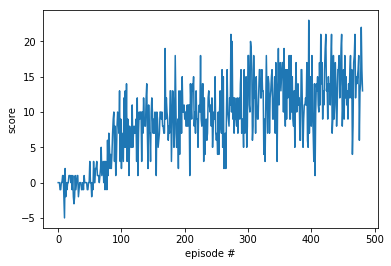

save model to navigation_double.pth


In [8]:
double_monitor = Monitor()
double_params = Parameters()
double_params.double = True

double_monitor.run(double_params, "double")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


 0/2000: average score 1.00

 1/2000: average score 1.50

 2/2000: average score 3.00

 3/2000: average score 4.00

 4/2000: average score 4.60

 5/2000: average score 5.50

 6/2000: average score 5.57

 7/2000: average score 5.50

 8/2000: average score 5.00

 9/2000: average score 4.40

 10/2000: average score 4.09

 11/2000: average score 3.75

 12/2000: average score 4.23

 13/2000: average score 4.29

 14/2000: average score 4.53

 15/2000: average score 4.56

 16/2000: average score 4.29

 17/2000: average score 4.50

 18/2000: average score 4.79

 19/2000: average score 4.75

 20/2000: average score 4.62

 21/2000: average score 4.73

 22/2000: average score 4.61

 23/2000: average score 4.58

 24/2000: average score 4.60

 25/2000: average score 4.69

 26/2000: average score 4.63

 27/2000: average score 4.86

 28/2000: average score 5.14

 29/2000: average score 5.27

 30/2000: average score 5.52

 31/2000: average score 5.53

 32/2000: average score 5.73

 33/2000: average score 5.79

 34/2000: average score 5.94

 35/2000: average score 5.89

 36/2000: average score 6.08

 37/2000: average score 6.24

 38/2000: average score 6.23

 39/2000: average score 6.28

 40/2000: average score 6.39

 41/2000: average score 6.48

 42/2000: average score 6.42

 43/2000: average score 6.36

 44/2000: average score 6.51

 45/2000: average score 6.50

 46/2000: average score 6.66

 47/2000: average score 6.69

 48/2000: average score 6.73

 49/2000: average score 6.78

 50/2000: average score 6.82

 51/2000: average score 6.75

 52/2000: average score 6.79

 53/2000: average score 6.87

 54/2000: average score 6.87

 55/2000: average score 6.89

 56/2000: average score 6.93

 57/2000: average score 6.95

 58/2000: average score 6.93

 59/2000: average score 6.85

 60/2000: average score 6.80

 61/2000: average score 6.84

 62/2000: average score 6.75

 63/2000: average score 6.78

 64/2000: average score 6.77

 65/2000: average score 6.85

 66/2000: average score 6.88

 67/2000: average score 6.91

 68/2000: average score 7.01

 69/2000: average score 7.04

 70/2000: average score 7.00

 71/2000: average score 6.99

 72/2000: average score 7.07

 73/2000: average score 7.01

 74/2000: average score 6.97

 75/2000: average score 7.12

 76/2000: average score 7.12

 77/2000: average score 7.22

 78/2000: average score 7.27

 79/2000: average score 7.31

 80/2000: average score 7.42

 81/2000: average score 7.50

 82/2000: average score 7.51

 83/2000: average score 7.49

 84/2000: average score 7.41

 85/2000: average score 7.37

 86/2000: average score 7.32

 87/2000: average score 7.32

 88/2000: average score 7.35

 89/2000: average score 7.41

 90/2000: average score 7.51

 91/2000: average score 7.57

 92/2000: average score 7.54

 93/2000: average score 7.60

 94/2000: average score 7.57

 95/2000: average score 7.56

 96/2000: average score 7.58

 97/2000: average score 7.61

 98/2000: average score 7.70

 99/2000: average score 7.70

 100/2000: average score 7.78

 101/2000: average score 7.82

 102/2000: average score 7.84

 103/2000: average score 7.94

 104/2000: average score 8.00

 105/2000: average score 7.95

 106/2000: average score 8.00

 107/2000: average score 8.05

 108/2000: average score 8.13

 109/2000: average score 8.21

 110/2000: average score 8.32

 111/2000: average score 8.38

 112/2000: average score 8.35

 113/2000: average score 8.40

 114/2000: average score 8.48

 115/2000: average score 8.59

 116/2000: average score 8.66

 117/2000: average score 8.73

 118/2000: average score 8.68

 119/2000: average score 8.75

 120/2000: average score 8.86

 121/2000: average score 8.87

 122/2000: average score 8.97

 123/2000: average score 8.98

 124/2000: average score 9.02

 125/2000: average score 9.11

 126/2000: average score 9.15

 127/2000: average score 9.17

 128/2000: average score 9.19

 129/2000: average score 9.21

 130/2000: average score 9.24

 131/2000: average score 9.35

 132/2000: average score 9.43

 133/2000: average score 9.46

 134/2000: average score 9.47

 135/2000: average score 9.50

 136/2000: average score 9.53

 137/2000: average score 9.60

 138/2000: average score 9.66

 139/2000: average score 9.66

 140/2000: average score 9.68

 141/2000: average score 9.72

 142/2000: average score 9.83

 143/2000: average score 9.94

 144/2000: average score 9.90

 145/2000: average score 9.93

 146/2000: average score 9.86

 147/2000: average score 9.81

 148/2000: average score 9.88

 149/2000: average score 9.97

 150/2000: average score 10.06

 151/2000: average score 10.11

 152/2000: average score 10.15

 153/2000: average score 10.18

 154/2000: average score 10.17

 155/2000: average score 10.24

 156/2000: average score 10.31

 157/2000: average score 10.28

 158/2000: average score 10.33

 159/2000: average score 10.42

 160/2000: average score 10.45

 161/2000: average score 10.46

 162/2000: average score 10.50

 163/2000: average score 10.50

 164/2000: average score 10.49

 165/2000: average score 10.50

 166/2000: average score 10.48

 167/2000: average score 10.51

 168/2000: average score 10.48

 169/2000: average score 10.46

 170/2000: average score 10.47

 171/2000: average score 10.56

 172/2000: average score 10.61

 173/2000: average score 10.68

 174/2000: average score 10.78

 175/2000: average score 10.70

 176/2000: average score 10.73

 177/2000: average score 10.69

 178/2000: average score 10.65

 179/2000: average score 10.63

 180/2000: average score 10.54

 181/2000: average score 10.55

 182/2000: average score 10.67

 183/2000: average score 10.71

 184/2000: average score 10.89

 185/2000: average score 10.94

 186/2000: average score 11.06

 187/2000: average score 11.19

 188/2000: average score 11.24

 189/2000: average score 11.23

 190/2000: average score 11.18

 191/2000: average score 11.14

 192/2000: average score 11.25

 193/2000: average score 11.27

 194/2000: average score 11.35

 195/2000: average score 11.38

 196/2000: average score 11.41

 197/2000: average score 11.40

 198/2000: average score 11.33

 199/2000: average score 11.41

 200/2000: average score 11.43

 201/2000: average score 11.53

 202/2000: average score 11.54

 203/2000: average score 11.58

 204/2000: average score 11.62

 205/2000: average score 11.74

 206/2000: average score 11.79

 207/2000: average score 11.79

 208/2000: average score 11.80

 209/2000: average score 11.89

 210/2000: average score 11.96

 211/2000: average score 12.07

 212/2000: average score 12.07

 213/2000: average score 12.01

 214/2000: average score 11.97

 215/2000: average score 11.91

 216/2000: average score 11.98

 217/2000: average score 11.98

 218/2000: average score 12.06

 219/2000: average score 12.08

 220/2000: average score 12.13

 221/2000: average score 12.18

 222/2000: average score 12.18

 223/2000: average score 12.33

 224/2000: average score 12.45

 225/2000: average score 12.46

 226/2000: average score 12.62

 227/2000: average score 12.61

 228/2000: average score 12.61

 229/2000: average score 12.60

 230/2000: average score 12.54

 231/2000: average score 12.52

 232/2000: average score 12.48

 233/2000: average score 12.46

 234/2000: average score 12.49

 235/2000: average score 12.64

 236/2000: average score 12.64

 237/2000: average score 12.59

 238/2000: average score 12.59

 239/2000: average score 12.69

 240/2000: average score 12.70

 241/2000: average score 12.69

 242/2000: average score 12.66

 243/2000: average score 12.59

 244/2000: average score 12.71

 245/2000: average score 12.72

 246/2000: average score 12.83

 247/2000: average score 12.97

 248/2000: average score 12.92

 249/2000: average score 12.91

 250/2000: average score 12.91

 251/2000: average score 12.95

 252/2000: average score 12.99

 253/2000: average score 13.00


solved in 253 episodes


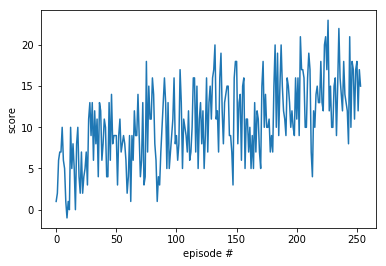

save model to navigation_dueling.pth


In [7]:
dueling_monitor = Monitor()
dueling_params = Parameters()
dueling_params.double = True
dueling_params.dueling = True

dueling_monitor.run(dueling_params, "dueling")